# Projet :  Segmentez des clients d'un site e-commerce

## Première partie : Analyse exploratoire 

## Sommaire

### Chargement des jeux de données

- Un exemple avec la représentation graphique des clients

### Analyse des commandes passées par client

- Merge des données clients et commandes

- Analyser le nombre de commandes par client et calculer le pourcentage de clients ayant passé plusieurs commandes

### Feature engineering

- Regrouper les informations des commandes par client

- Merge des payements de commandes à notre dataset

- Une représentation graphique des indicateurs RFM 

### Chargement des jeux de données

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# chargement des données des commandes
order_df = pd.read_csv('./data/olist_orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


<AxesSubplot:>

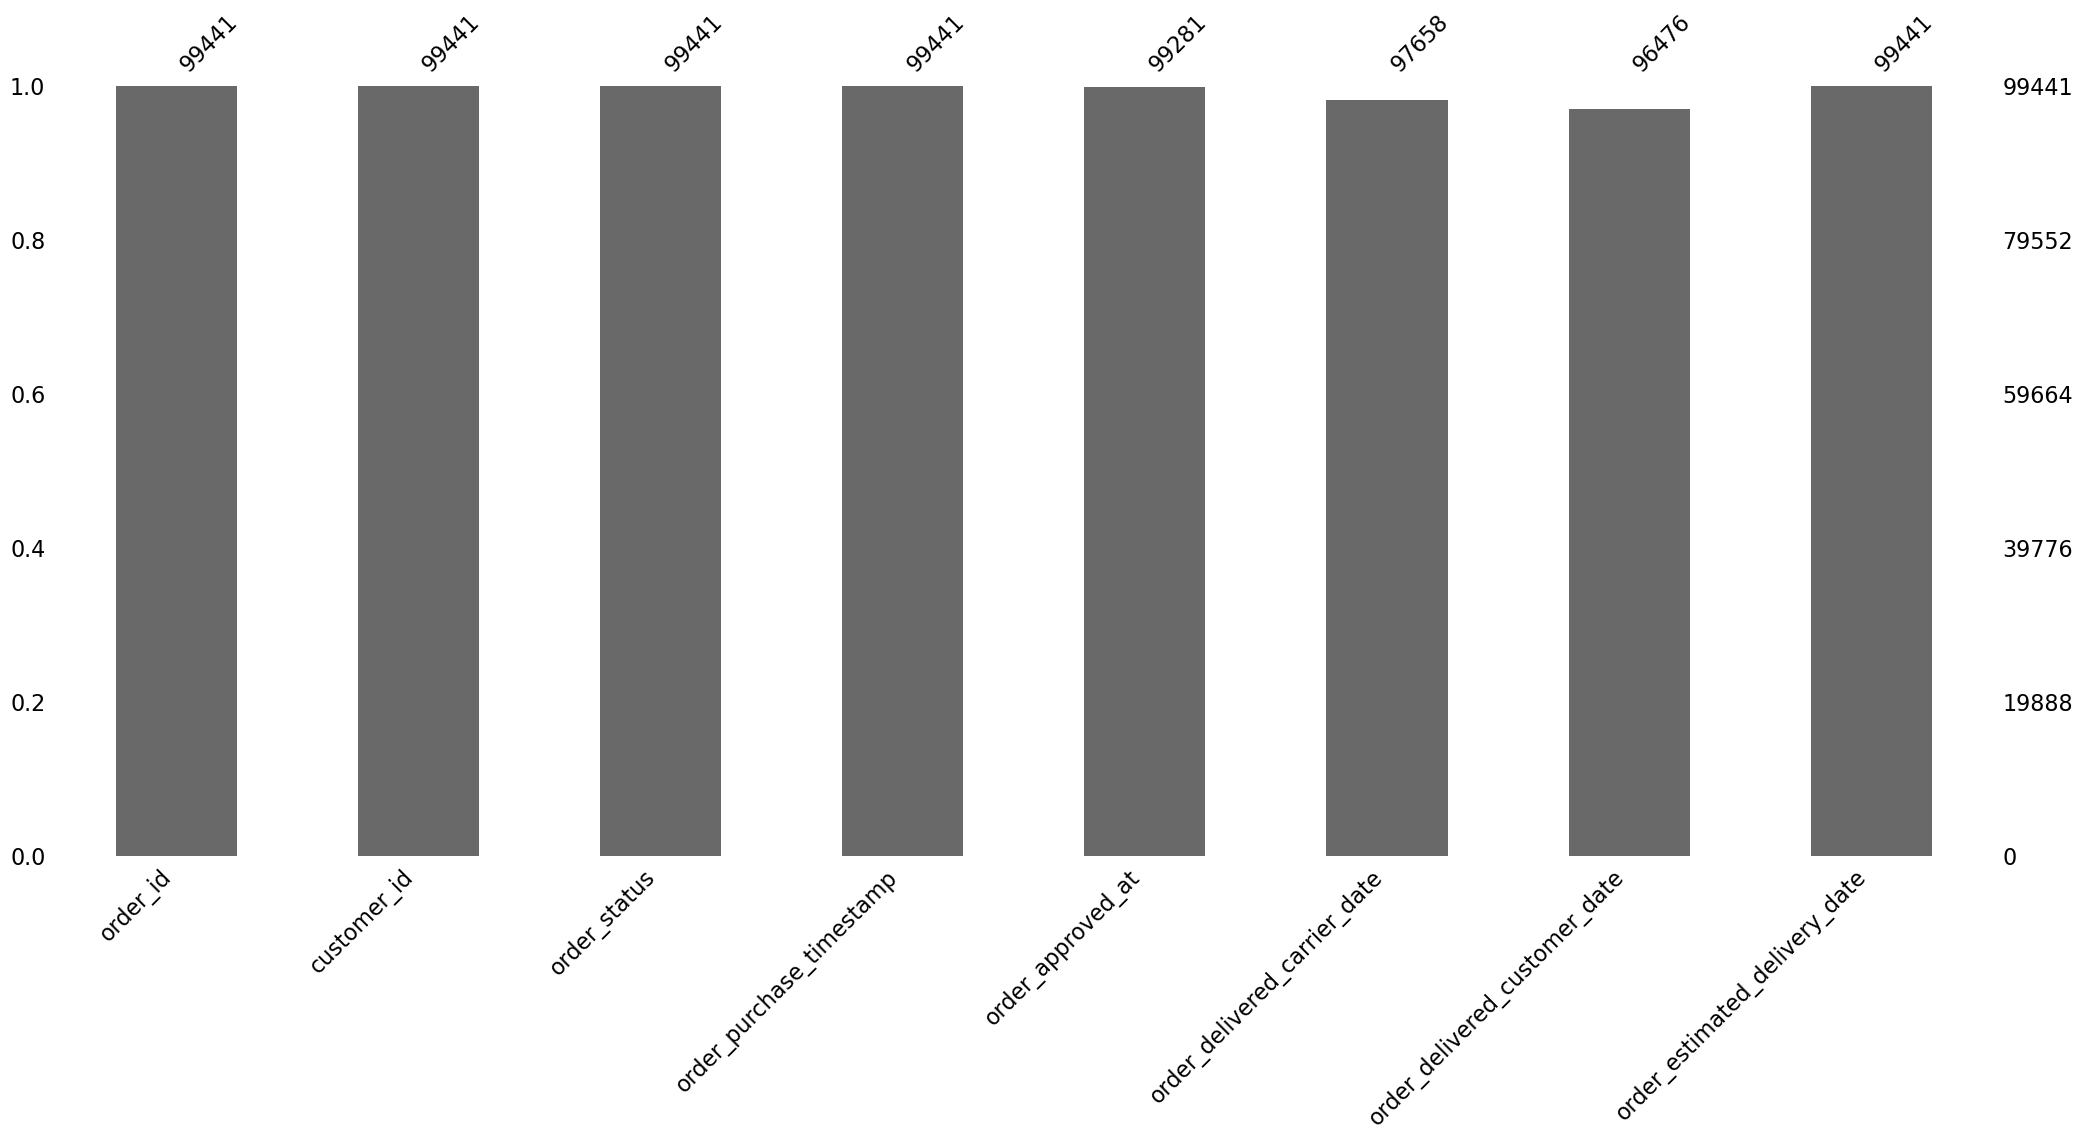

In [4]:
msno.bar(order_df)

In [34]:
order_df.duplicated().sum()

0

In [3]:
# chargement des données des clients
customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


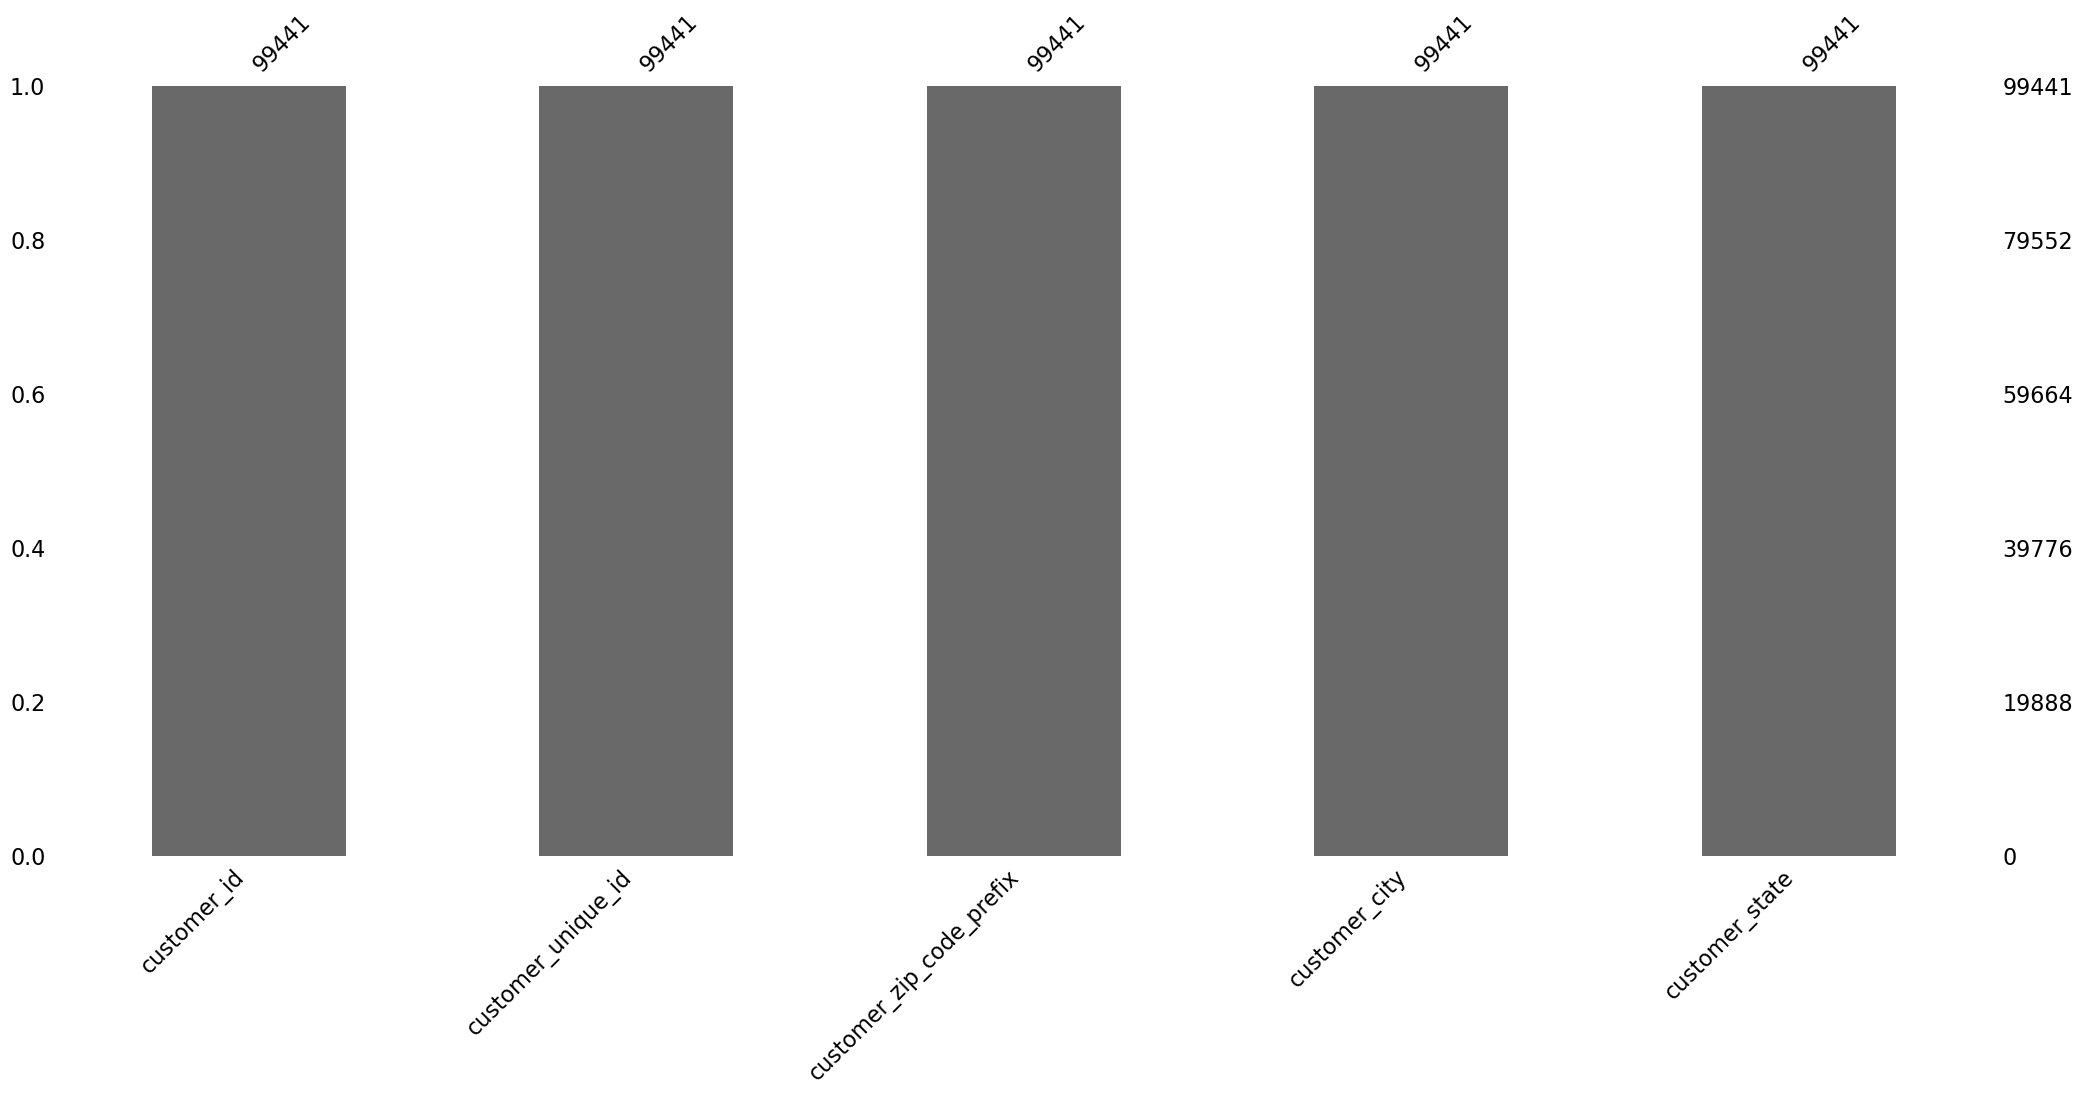

In [4]:
msno.bar(customers_df)
plt.savefig('customers_df.png')

In [35]:
customers_df.duplicated().sum()

0

In [4]:
# chargement des données de catégories de produits
product_category_name_translation_df = pd.read_csv('./data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


<AxesSubplot:>

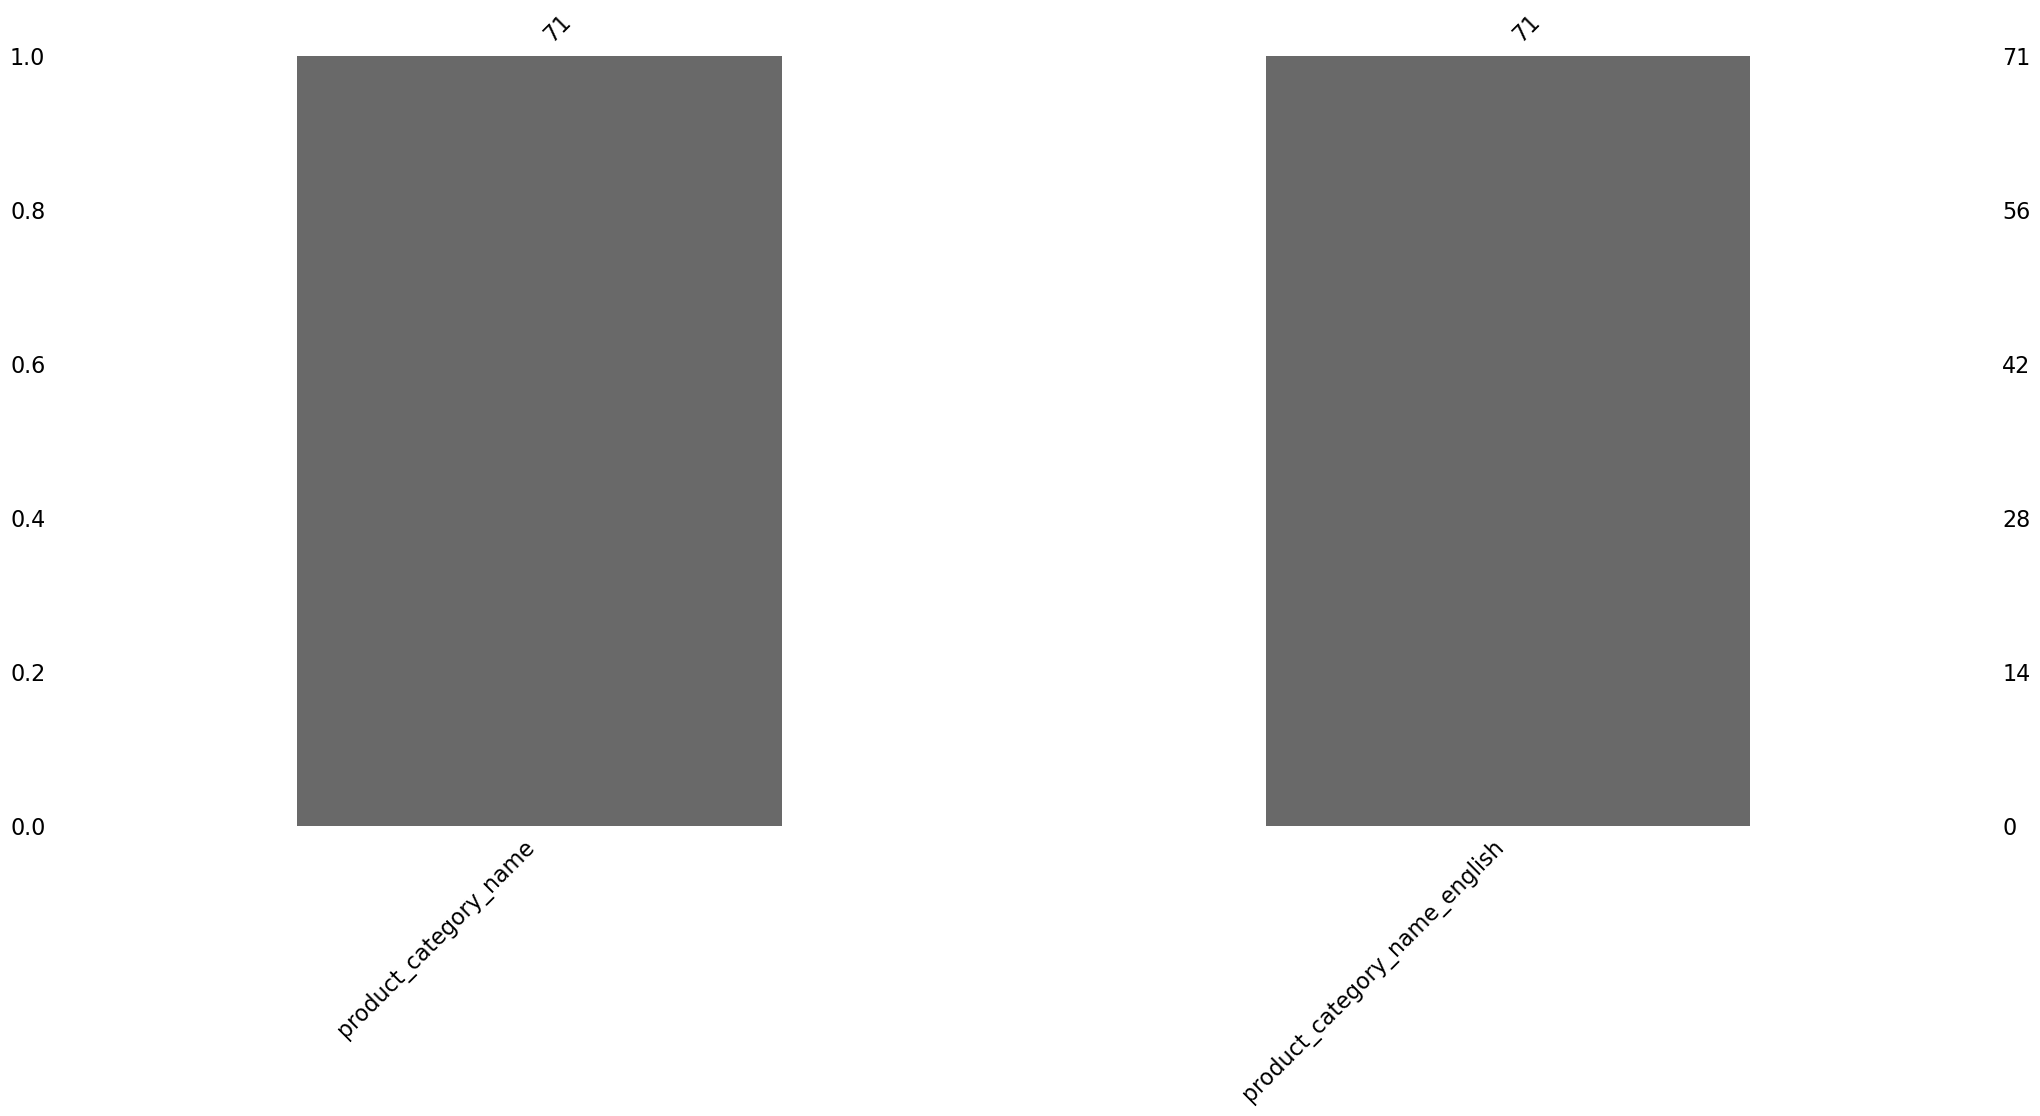

In [12]:
msno.bar(product_category_name_translation_df)

In [5]:
# chargement des données des vendeurs
olist_sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
olist_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
olist_sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


<AxesSubplot:>

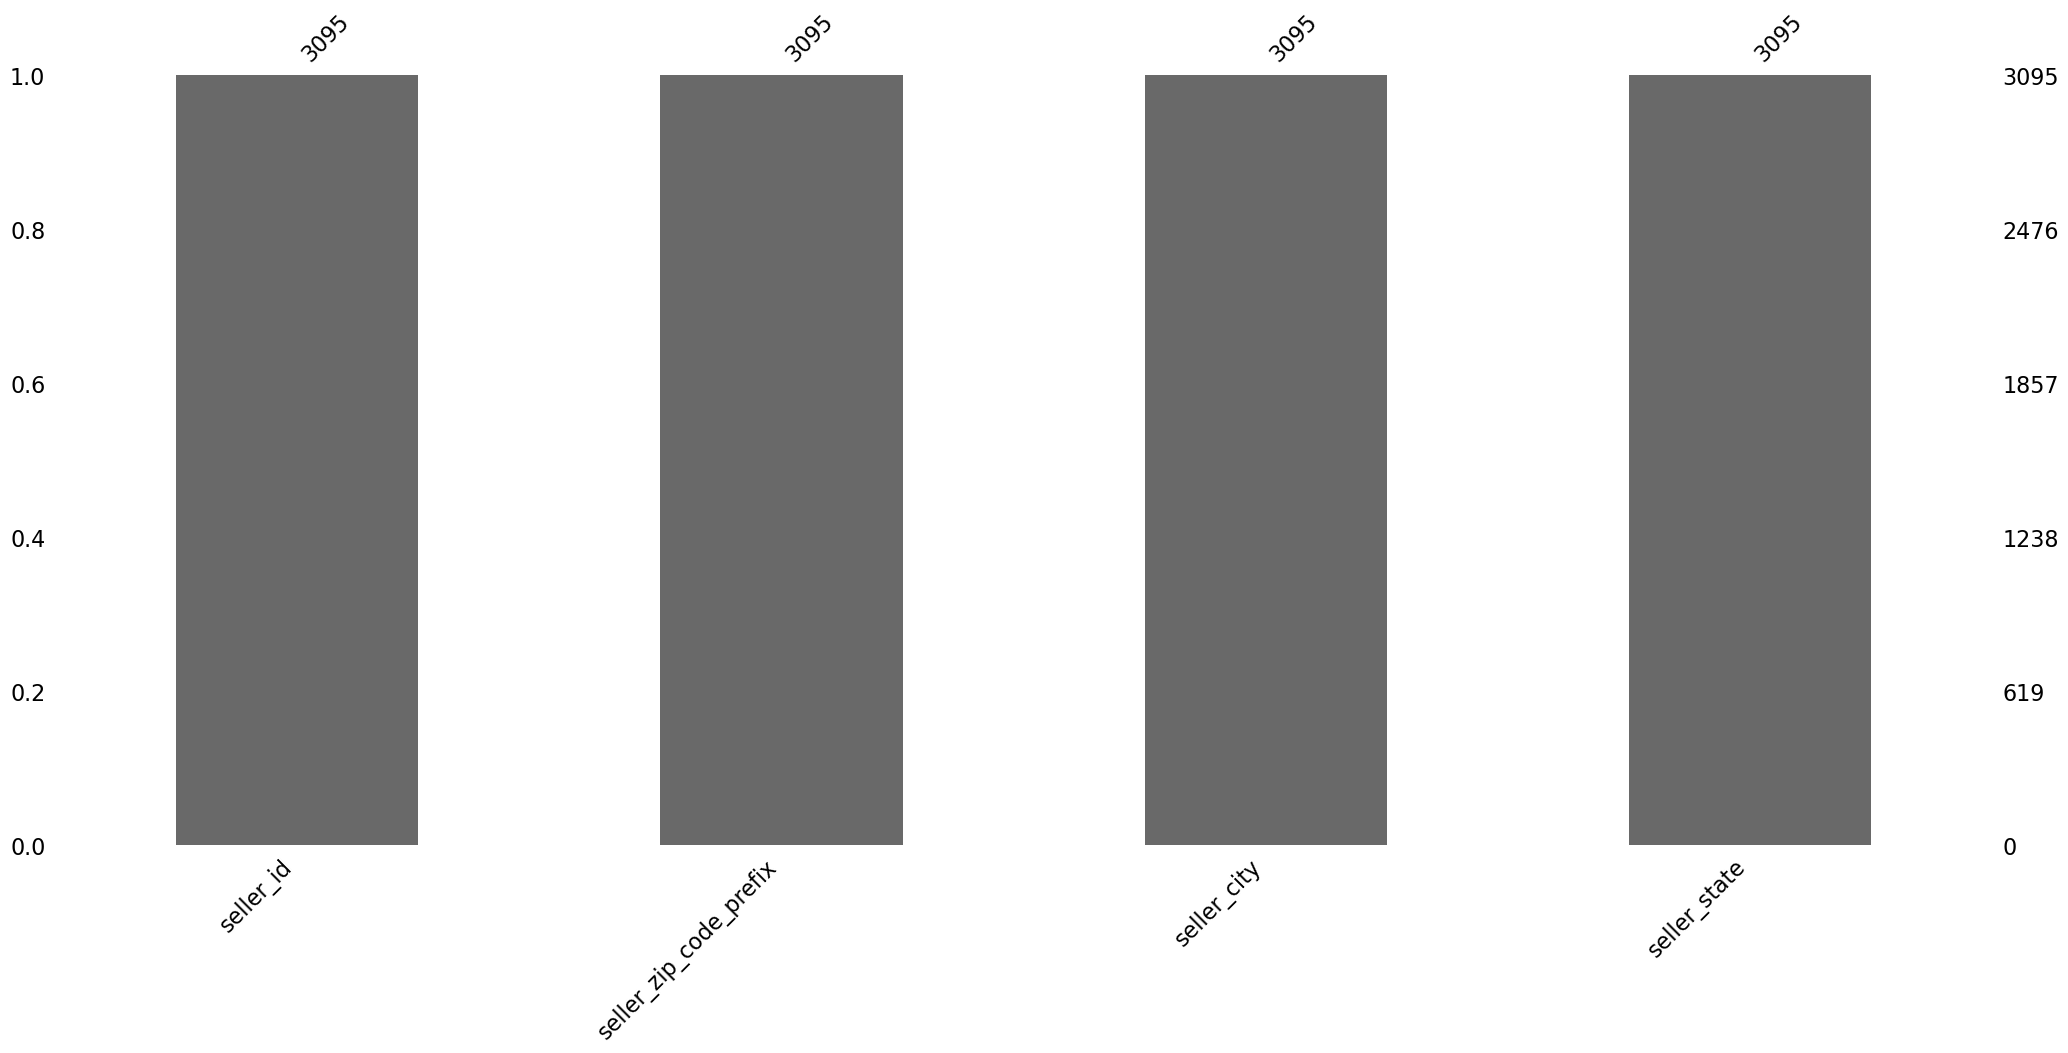

In [16]:
msno.bar(olist_sellers_df)

In [6]:
# chargement des données des produits
olist_products_df = pd.read_csv('./data/olist_products_dataset.csv')
olist_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
olist_products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<AxesSubplot:>

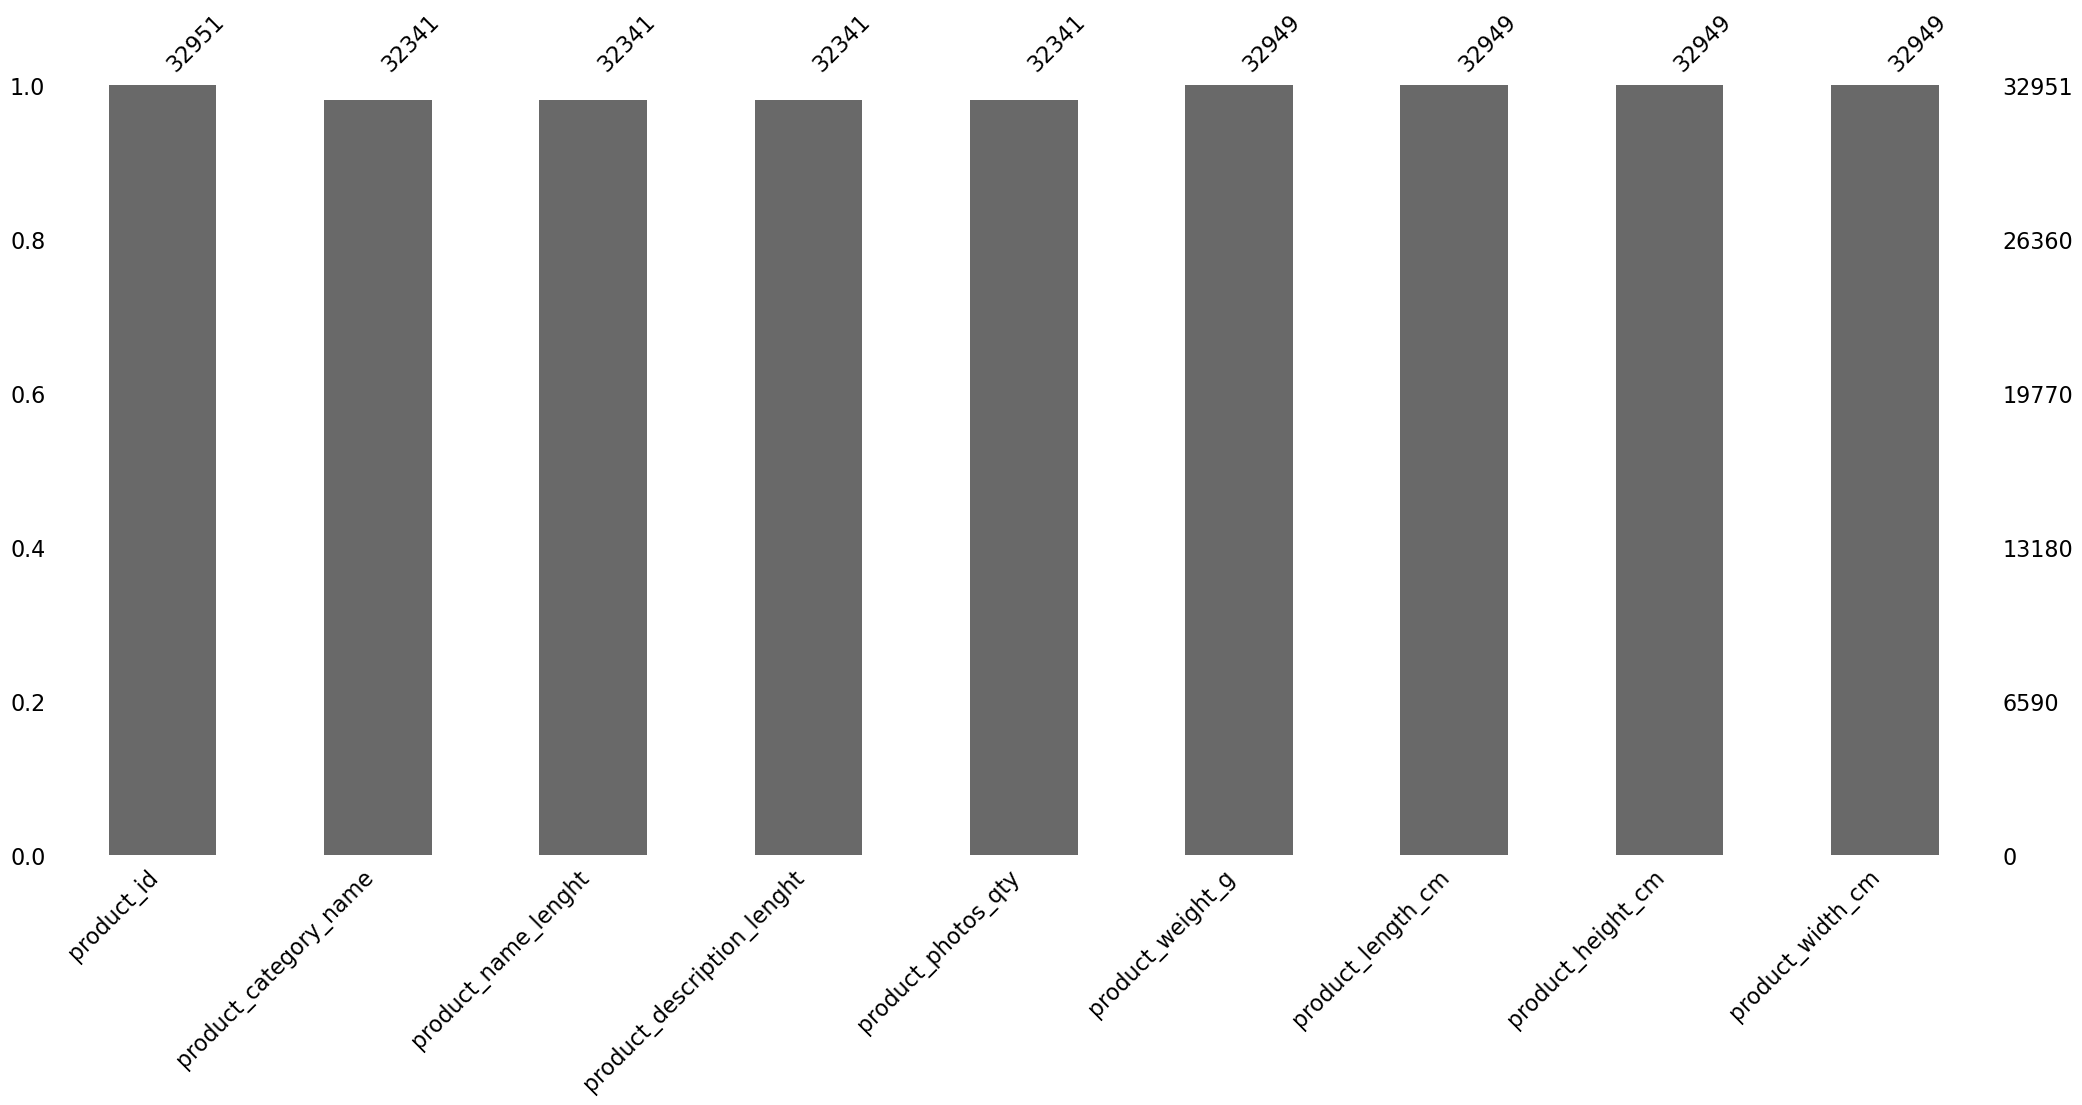

In [20]:
msno.bar(olist_products_df)

In [7]:
# Chargement d'ensemble de données de revues de commandes 
olist_order_reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
olist_order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
olist_order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:>

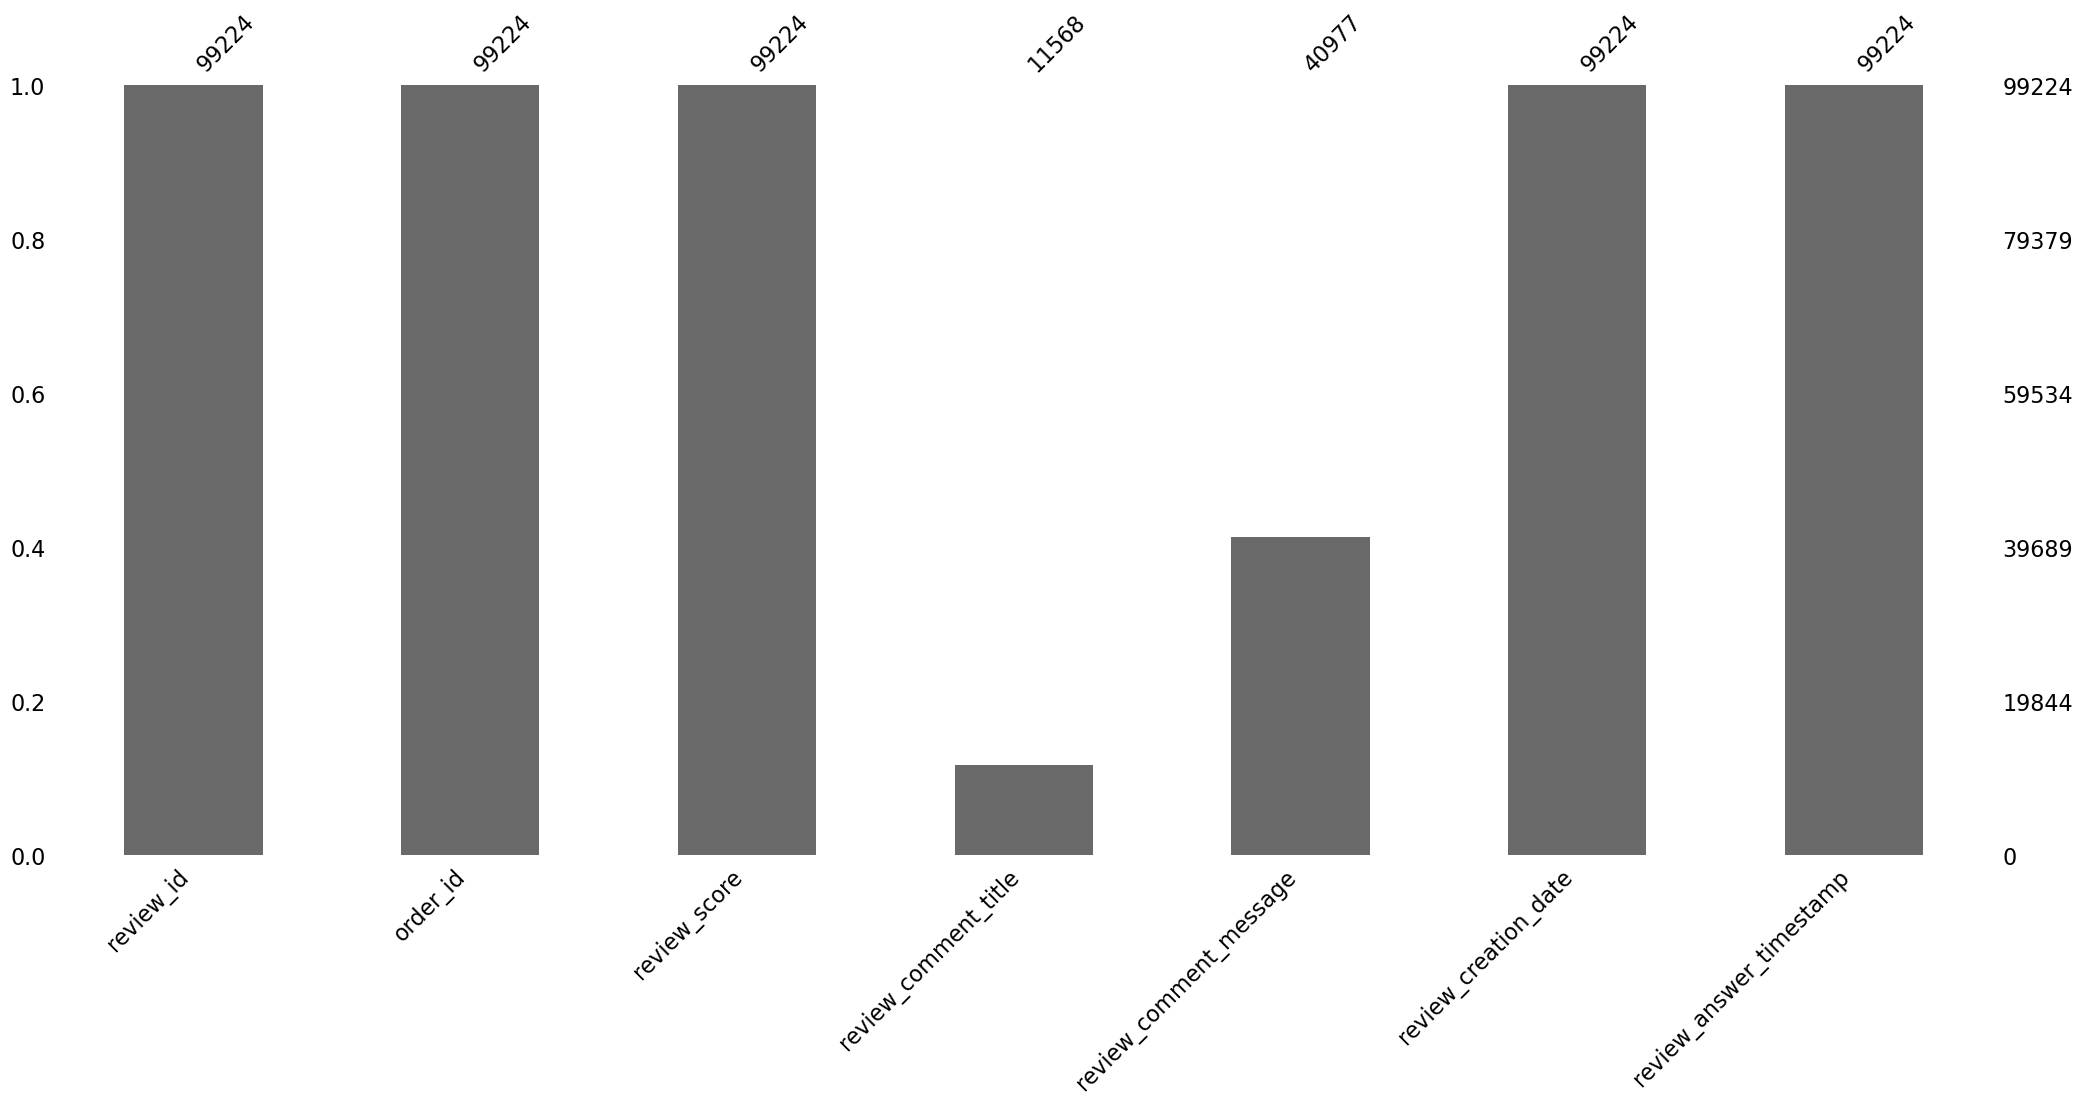

In [23]:
msno.bar(olist_order_reviews_df)

In [8]:
# chargement des données de payements de commandes
olist_order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
olist_order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
olist_order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


<AxesSubplot:>

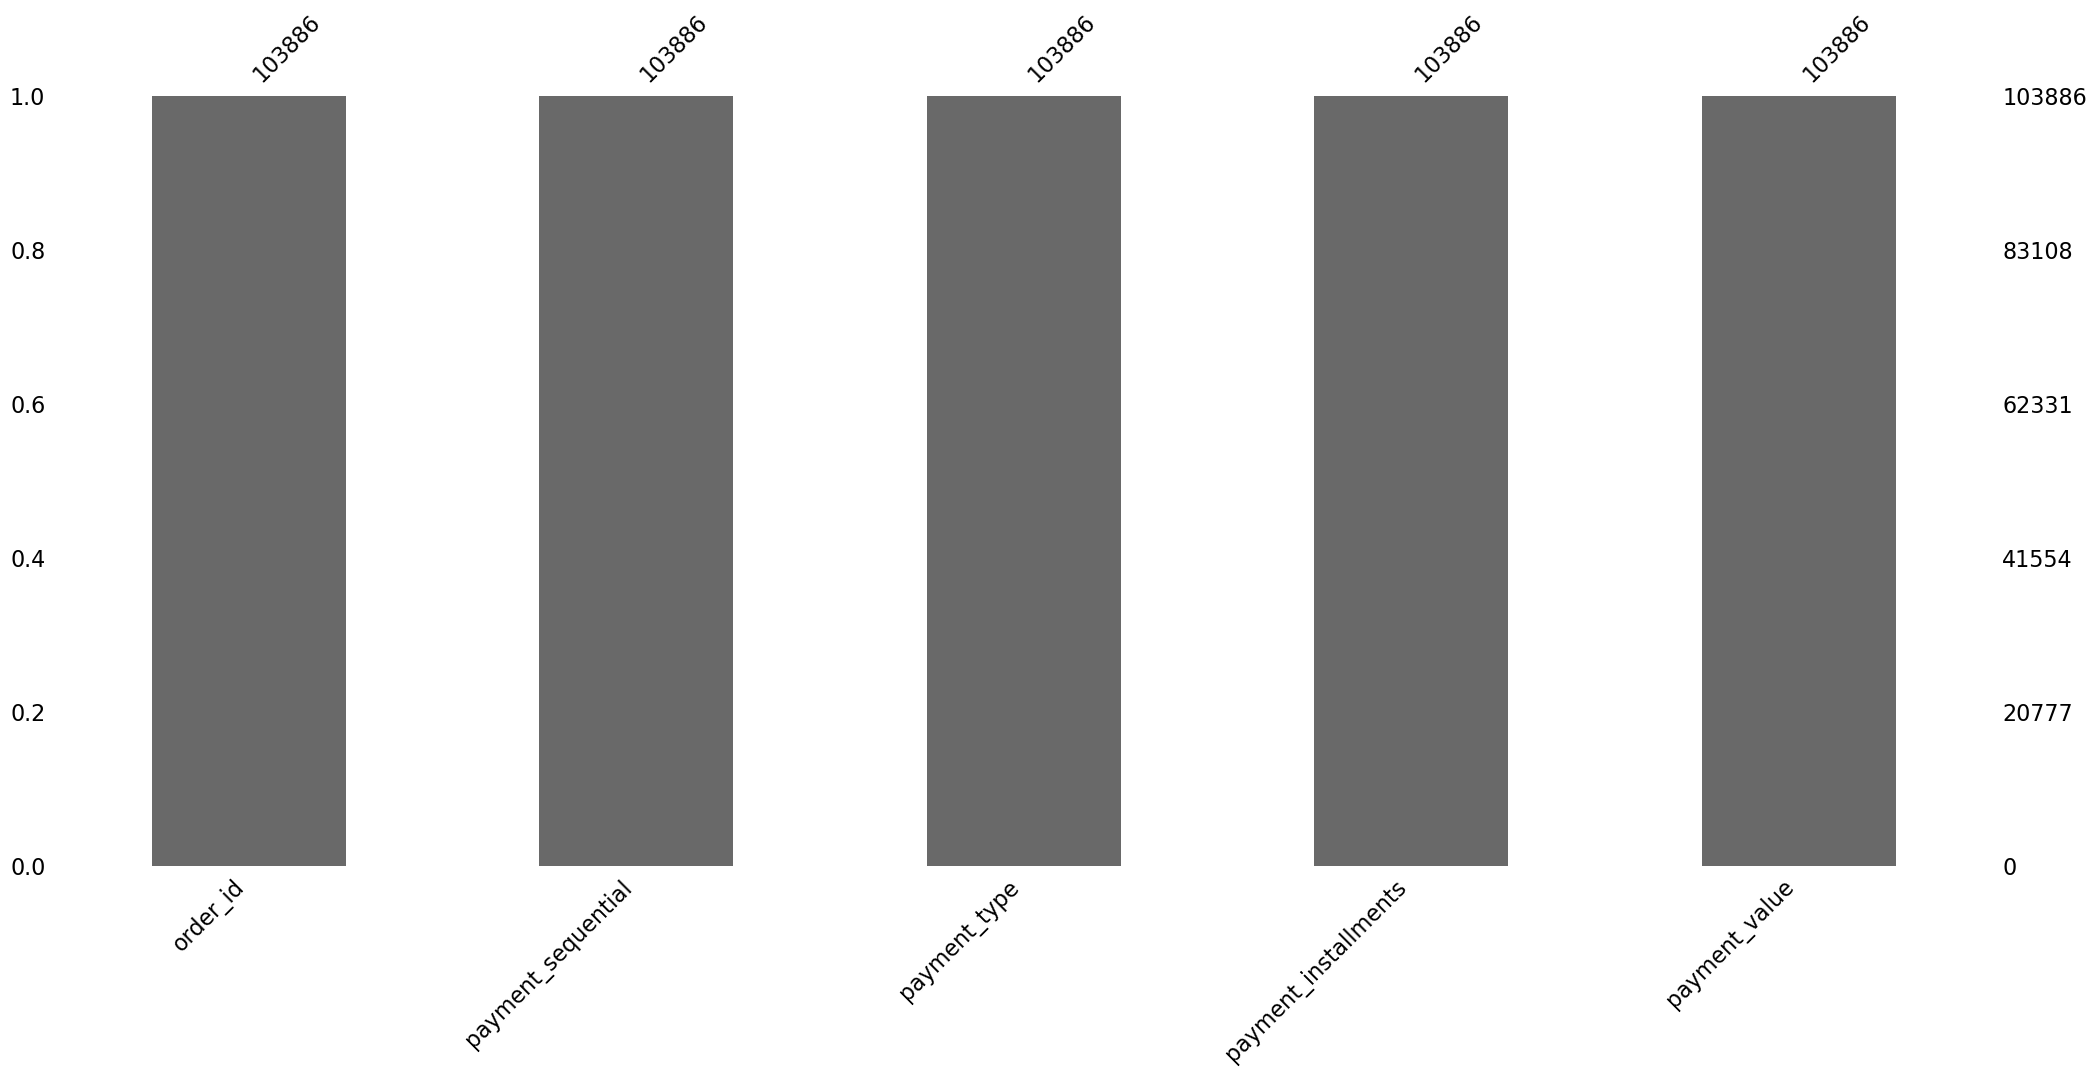

In [26]:
msno.bar(olist_order_payments_df)

In [9]:
# chargement des données des articles de commmandes
olist_order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
olist_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [28]:
olist_order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<AxesSubplot:>

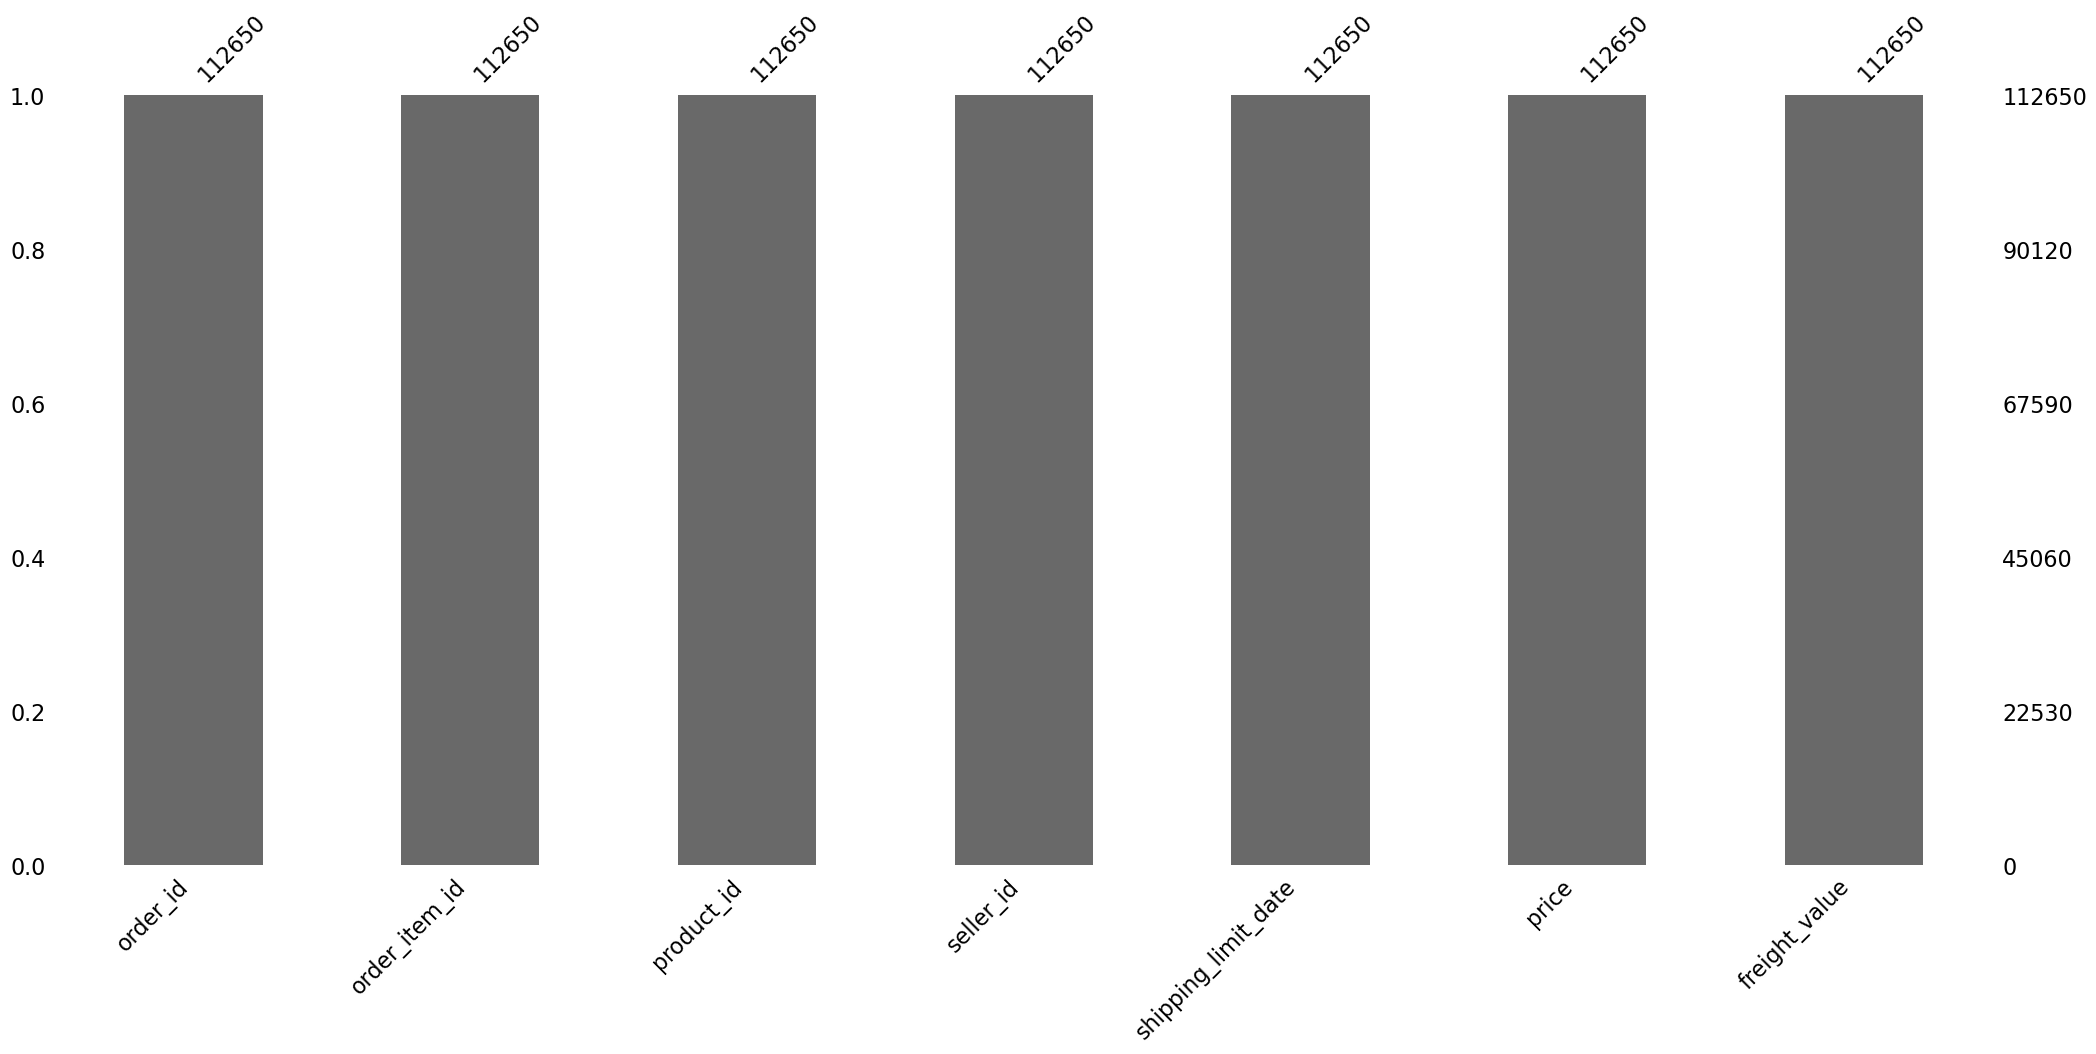

In [29]:
msno.bar(olist_order_items_df)

In [10]:
# chargement des données de géolocalisation clients et vendeurs
olist_geolocation_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
olist_geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [31]:
olist_geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


<AxesSubplot:>

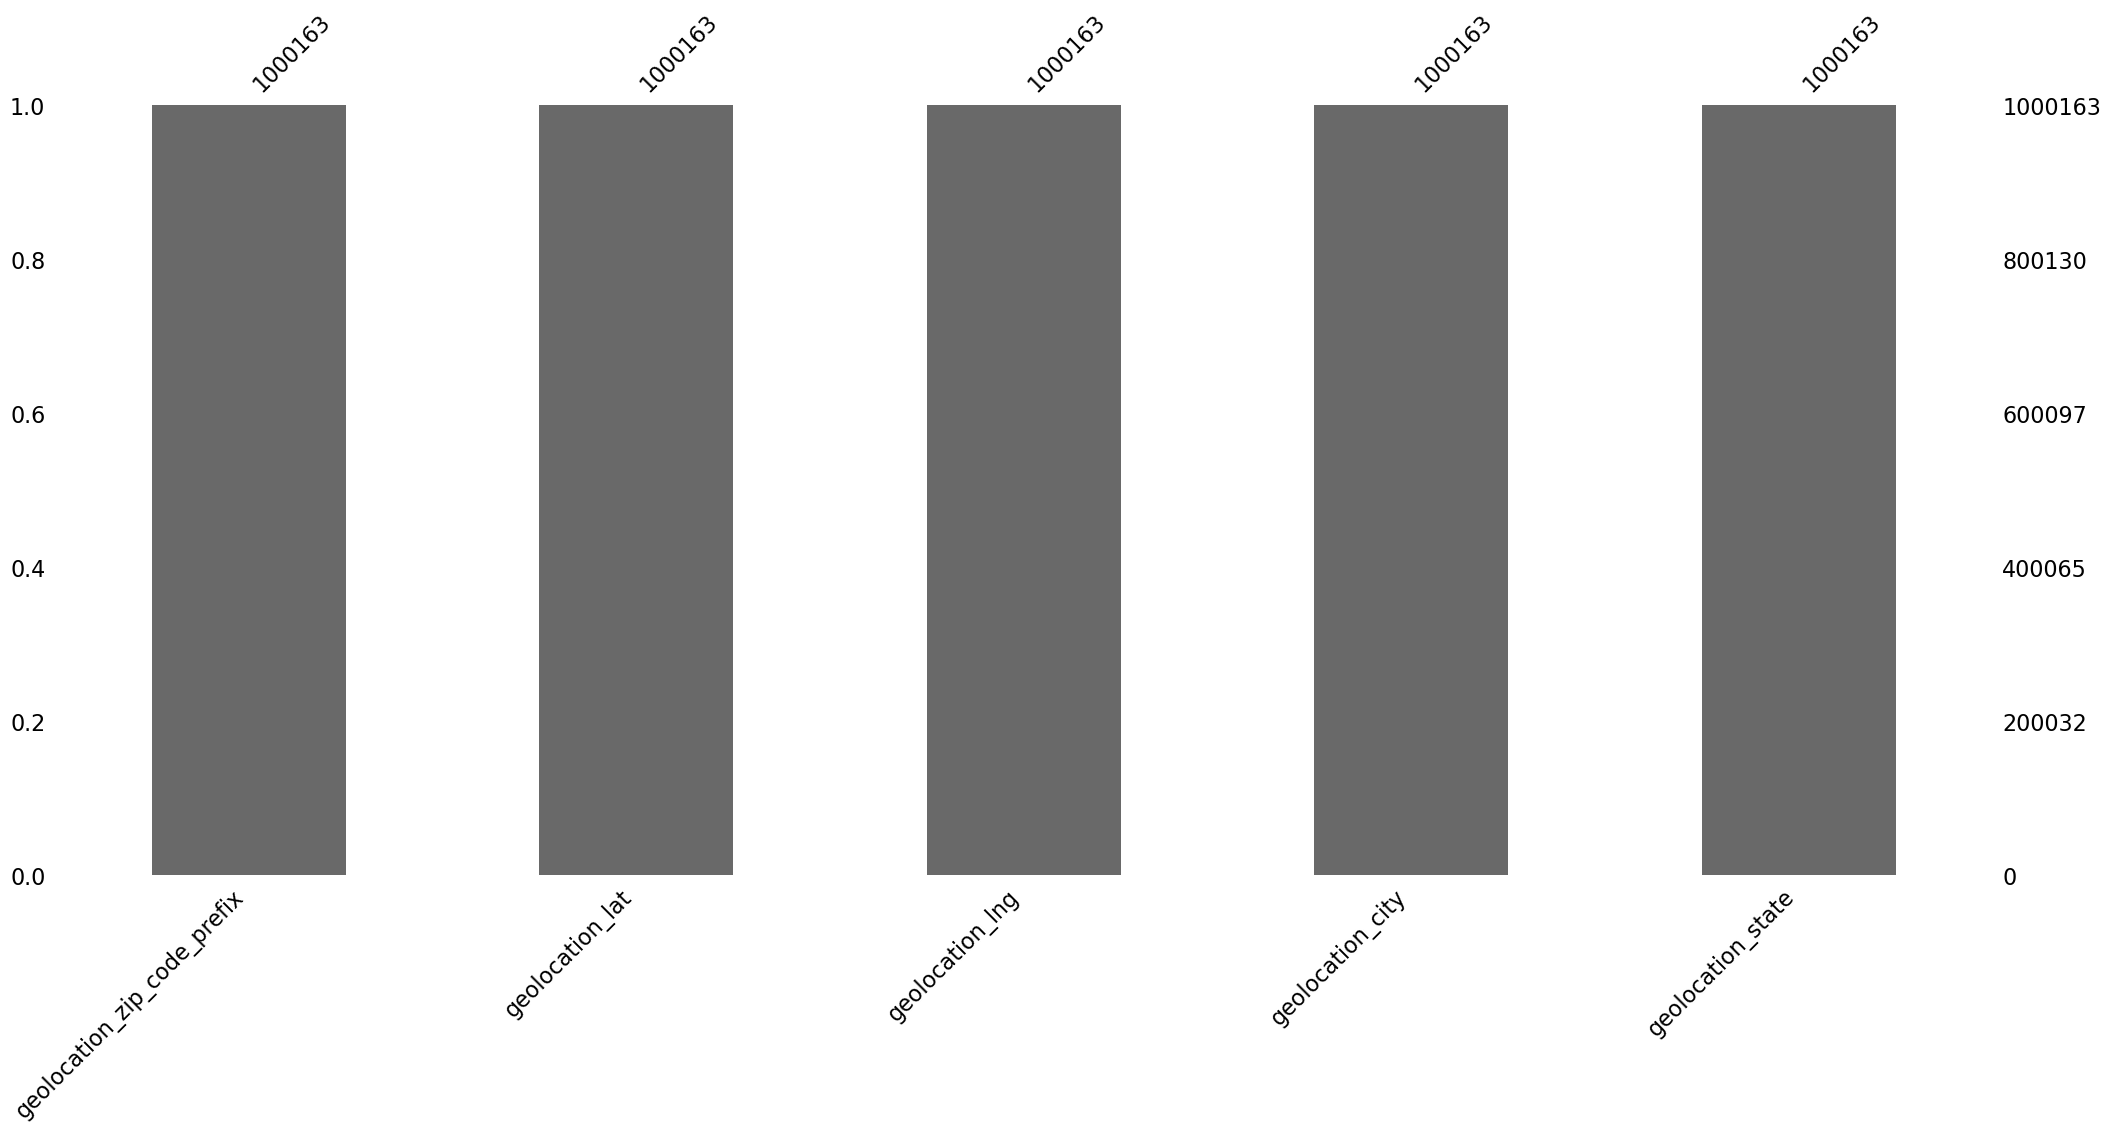

In [32]:
msno.bar(olist_geolocation_df)

### Analyse des commandes passées par client

- Merge des données clients et commandes

In [11]:
# Merge des DataFrames clients et commandes
df_merged = order_df.merge(customers_df, how = "left", on = "customer_id")
df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


- Analyser le nombre de commandes par client et calculer le pourcentage de clients ayant passé plusieurs commandes

In [12]:
# Calcul du nombre de commandes par client
number_of_orders_per_customer = df_merged['customer_unique_id'].value_counts().reset_index()
number_of_orders_per_customer.columns = ['customer_unique_id', 'number_of_orders']

# Calcul du nombre de clients ayant passé plusieurs commandes
multiple_customers_orders = (number_of_orders_per_customer['number_of_orders'] > 1).sum()

# Calcul du pourcentage de clients ayant passé plusieurs commandes
percentage_customers_multiple_orders = (multiple_customers_orders / len(number_of_orders_per_customer)) * 100

# Affichage des résultats
print("Nombre de commandes par client :\n", number_of_orders_per_customer)
print("Nombre de clients ayant passé plusieurs commandes :", multiple_customers_orders)
print("Pourcentage de clients ayant passé plusieurs commandes :", percentage_customers_multiple_orders)

Nombre de commandes par client :
                      customer_unique_id  number_of_orders
0      8d50f5eadf50201ccdcedfb9e2ac8455                17
1      3e43e6105506432c953e165fb2acf44c                 9
2      1b6c7548a2a1f9037c1fd3ddfed95f33                 7
3      ca77025e7201e3b30c44b472ff346268                 7
4      6469f99c1f9dfae7733b25662e7f1782                 7
...                                 ...               ...
96091  d6fe1d8f8260d270ec05c8b3065c8eaa                 1
96092  8c0386035e15f02612c89d29d7694b41                 1
96093  c1c0e094a7fbde66794da6ee9f9d1dda                 1
96094  6d90b4cc432b22857f3660864f240b0c                 1
96095  60350aa974b26ff12caad89e55993bd6                 1

[96096 rows x 2 columns]
Nombre de clients ayant passé plusieurs commandes : 2997
Pourcentage de clients ayant passé plusieurs commandes : 3.1187562437562435


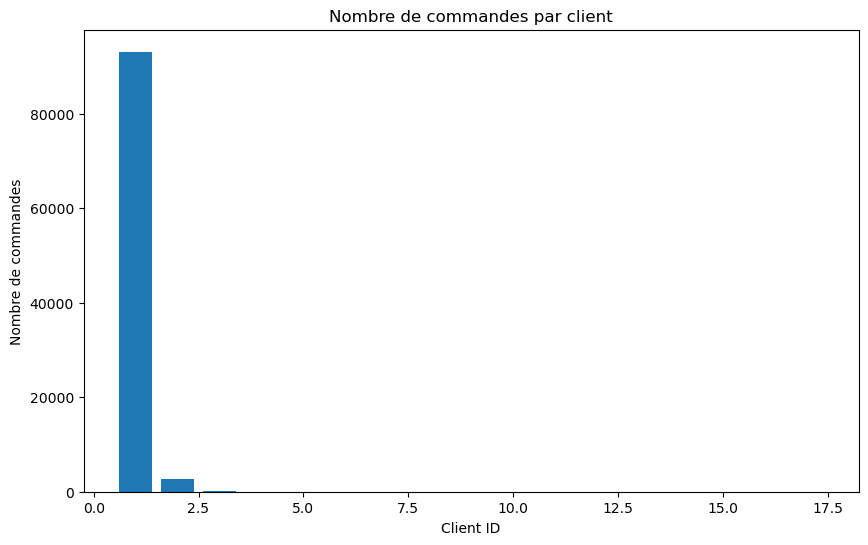

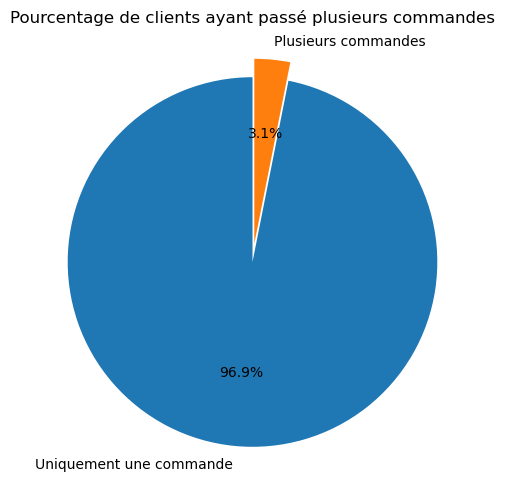

In [13]:
# Création du graphique à barres pour le nombre de commandes par client
plt.figure(figsize=(10, 6))

number_of_orders_per_customer = number_of_orders_per_customer.reset_index().number_of_orders.value_counts()
plt.bar(number_of_orders_per_customer.index, number_of_orders_per_customer.values)

#plt.bar(number_of_orders_per_customer['customer_unique_id'], number_of_orders_per_customer['number_of_orders'])
plt.xlabel('Client ID')
plt.ylabel('Nombre de commandes')
plt.title('Nombre de commandes par client')
plt.show()

# Création du graphique à secteurs pour le pourcentage de clients ayant passé plusieurs commandes
labels = ['Uniquement une commande', 'Plusieurs commandes']
sizes = [number_of_orders_per_customer.sum() - multiple_customers_orders, multiple_customers_orders]
explode = (0, 0.1)  # Mettre en évidence la part des clients ayant passé plusieurs commandes

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pourcentage de clients ayant passé plusieurs commandes')
plt.savefig('rate_by_customer.png')
plt.show()

In [31]:
number_of_orders_per_customer

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: number_of_orders, dtype: int64

In [27]:
sizes

[-2988, 2997]

### Feature engineering 

- Regrouper les informations des commandes par client

In [14]:
# Regrouper les informations des commandes par client_unique_id
grouped_data = df_merged.groupby('customer_unique_id').agg({'order_id': 'count'})

# Renommer la colonne pour refléter le nombre de commandes
grouped_data = grouped_data.rename(columns={'order_id': 'number_of_orders'})

# Afficher les informations des commandes par client
print(grouped_data)

                                  number_of_orders
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2                 1
0000b849f77a49e4a4ce2b2a4ca5be3f                 1
0000f46a3911fa3c0805444483337064                 1
0000f6ccb0745a6a4b88665a16c9f078                 1
0004aac84e0df4da2b147fca70cf8255                 1
...                                            ...
fffcf5a5ff07b0908bd4e2dbc735a684                 1
fffea47cd6d3cc0a88bd621562a9d061                 1
ffff371b4d645b6ecea244b27531430a                 1
ffff5962728ec6157033ef9805bacc48                 1
ffffd2657e2aad2907e67c3e9daecbeb                 1

[96096 rows x 1 columns]


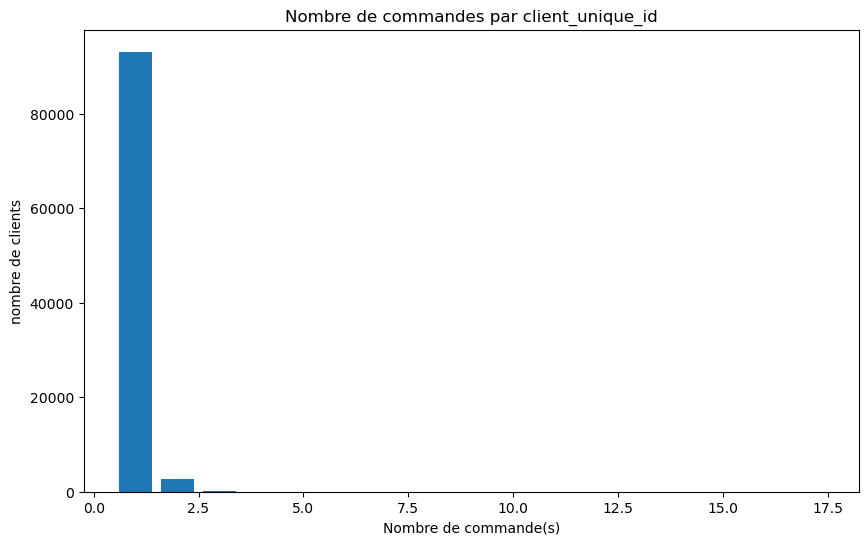

In [15]:
# Représentation graphique à barres du nombre de commandes par client_unique_id
plt.figure(figsize=(10, 6))
number_of_custumers_per_order = grouped_data.reset_index().number_of_orders.value_counts()
plt.bar(number_of_custumers_per_order.index, number_of_custumers_per_order.values)
plt.xlabel('Nombre de commande(s)')
plt.ylabel('nombre de clients')
plt.title('Nombre de commandes par client_unique_id')
plt.savefig('order_by_customer.png') 
plt.show()

In [ ]:
number_of_order_per_custumer

- Création des indicateurs RFM par client

In [17]:
# Merge des payements de commandes à notre dataset
df_merged = df_merged.merge(olist_order_payments_df, how = "left", on = "order_id")

In [18]:
# Conversion de la colonne 'date_commande' en type datetime
df_merged['order_date'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Calcul de la récence (Recency)
df_recency = df_merged.groupby('customer_unique_id')['order_date'].max().reset_index()
df_recency['recency'] = (pd.to_datetime('2022-11-01') - df_recency['order_date']).dt.days
df_recency.drop('order_date', axis=1, inplace=True)

# Calcul de la fréquence (Frequency)
df_frequency = df_merged.groupby('customer_unique_id')['order_id'].count().reset_index()
df_frequency.rename(columns={'order_id': 'frequency'}, inplace=True)

# Calcul du montant (Monetary)
df_monetary = df_merged.groupby('customer_unique_id')['payment_value'].sum().reset_index()
df_monetary.rename(columns={'payment_value': 'monetary'}, inplace=True)

# Fusion des indicateurs RFM
df_rfm = pd.merge(df_recency, df_frequency, on='customer_unique_id')
df_rfm = pd.merge(df_rfm, df_monetary, on='customer_unique_id')

# Affichage des indicateurs RFM
print(df_rfm)

                     customer_unique_id  recency  frequency  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2     1635          1    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1638          1     27.19
2      0000f46a3911fa3c0805444483337064     2061          1     86.22
3      0000f6ccb0745a6a4b88665a16c9f078     1845          1     43.62
4      0004aac84e0df4da2b147fca70cf8255     1812          1    196.89
...                                 ...      ...        ...       ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684     1971          1   2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061     1786          1     84.58
96093  ffff371b4d645b6ecea244b27531430a     2092          1    112.46
96094  ffff5962728ec6157033ef9805bacc48     1643          1    133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb     2008          1     71.56

[96096 rows x 4 columns]


- Une représentation graphique des indicateurs RFM 

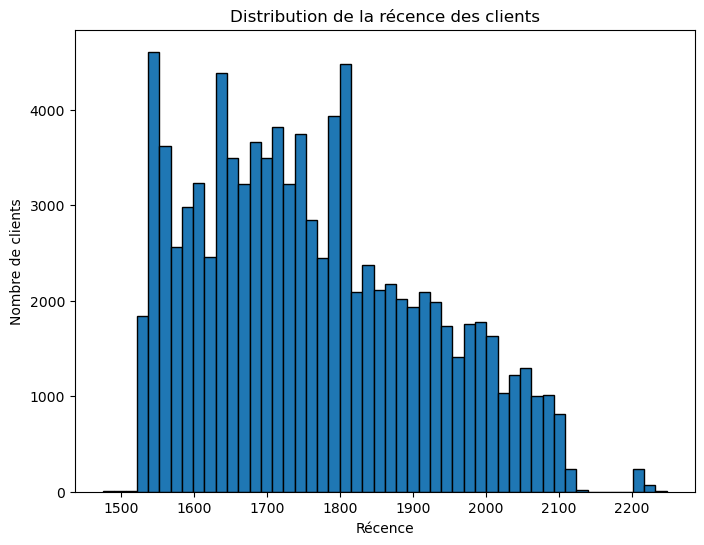

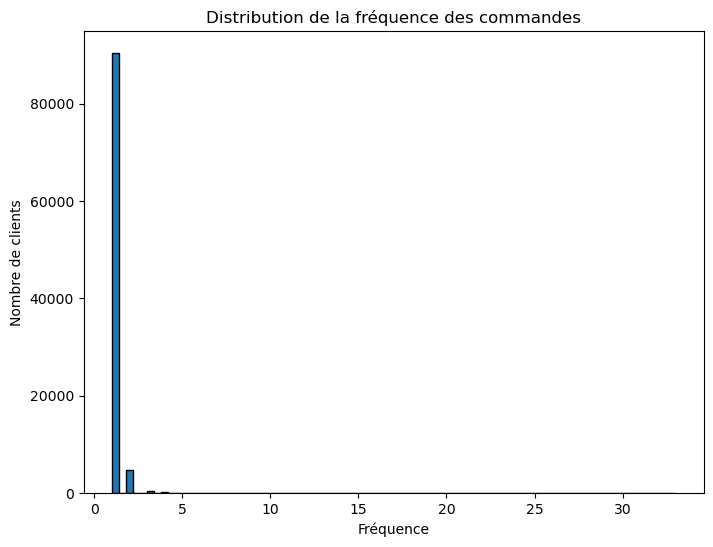

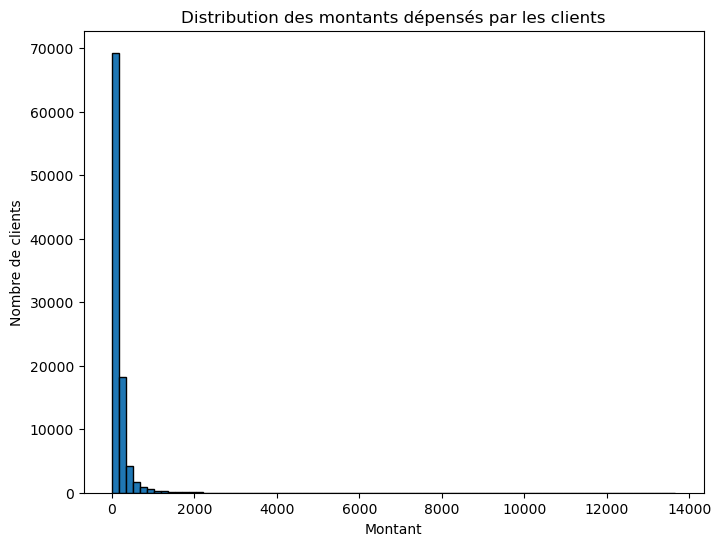

In [21]:
# Histogramme pour la récence
plt.figure(figsize=(8, 6))
plt.hist(df_rfm['recency'], bins=50, edgecolor='black')
plt.xlabel('Récence')
plt.ylabel('Nombre de clients')
plt.title('Distribution de la récence des clients')
plt.savefig('recency_histogram.png')  # Sauvegarder la figure
plt.show()

# Histogramme pour la fréquence
plt.figure(figsize=(8, 6))
plt.hist(df_rfm['frequency'], bins=80, edgecolor='black')
plt.xlabel('Fréquence')
plt.ylabel('Nombre de clients')
plt.title('Distribution de la fréquence des commandes')
plt.savefig('frequency_histogram.png')  # Sauvegarder la figure
plt.show()

# Histogramme pour le montant
plt.figure(figsize=(8, 6))
plt.hist(df_rfm['monetary'], bins=80, edgecolor='black')
plt.xlabel('Montant')
plt.ylabel('Nombre de clients')
plt.title('Distribution des montants dépensés par les clients')
plt.savefig('monetary_histogram.png')  # Sauvegarder la figure
plt.show()

In [28]:
df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1635,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1638,1,27.19
2,0000f46a3911fa3c0805444483337064,2061,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1845,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1812,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1971,1,2067.42
96092,fffea47cd6d3cc0a88bd621562a9d061,1786,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,2092,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,1643,1,133.69


In [15]:
df_rfm.to_csv('./data/df_rfm.csv', index=False)
df_merged.to_csv('./data/df_merged.csv', index=False)